In [12]:
import warnings
warnings.filterwarnings("ignore")

#Import and store the data in a data frame
import pandas as pd
air = pd.read_csv('airline.csv')
print(air.shape)

(1000, 11)


In [13]:
#Remove the outliers from the dataset

import numpy as np
import pandas as pd
Q1 = air.quantile(0.25)
Q3 = air.quantile(0.75)
IQR = Q3-Q1
air1= air[~((air< (Q1 - 1.5 * IQR)) | (air> (Q3 + 1.5 * IQR))).any(axis=1)]
print(air1.shape)

(885, 11)


In [14]:
air1.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [15]:
#Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

y=air1[["Average Fare"]]
x=air1.drop("Average Fare", axis=1)
print(x.head())
print(y.head())

  City1 City2  Distance  Average weekly passengers market leading airline  \
0   CAK   ATL       528                     424.56                     FL   
1   CAK   MCO       860                     276.84                     FL   
2   ALB   ATL       852                     215.76                     DL   
3   ALB   BWI       288                     606.84                     WN   
4   ALB   ORD       723                     313.04                     UA   

   market share1  Average fare Low price airline  market share2   price  
0          70.19        111.03                FL          70.19  111.03  
1          75.10        123.09                DL          17.23  118.94  
2          78.89        223.98                CO           2.77  167.12  
3          96.97         68.86                WN          96.97   68.86  
4          39.79        161.36                WN          15.34  145.42  
   Average Fare
0        114.47
1        122.47
2        214.42
3         69.40
4        158.

In [16]:
#Drop the independent variables which has less than 0.1 correlation with the dependent variable
to_drop= air1.corr()['Average Fare'] .abs()
for i in range(to_drop.shape[0]):
    if to_drop[i] < 0.1:
        col=to_drop.index[i]
        x.drop([col], axis='columns',inplace=True)

In [17]:
#No columns have been dropped as none of the columns have a correlation less than 0.1
x.head()

,City1,City2,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42


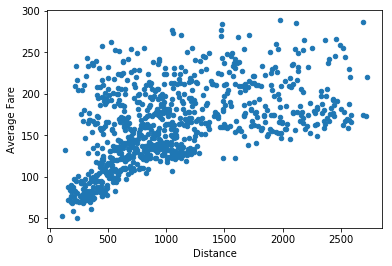

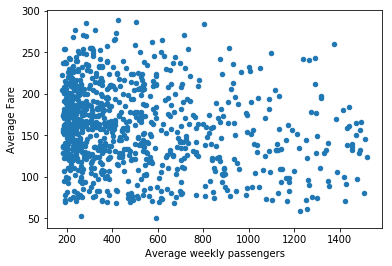

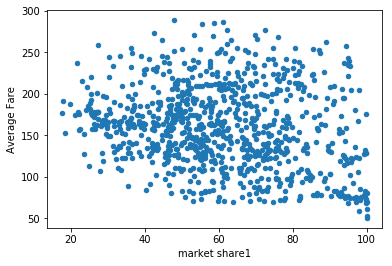

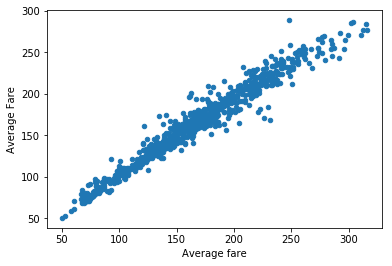

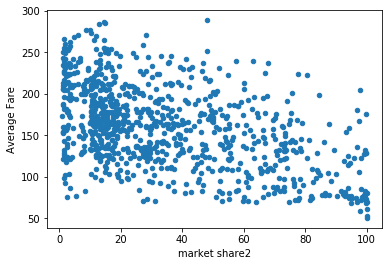

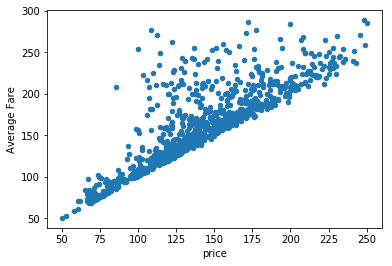

In [23]:
#Create scatter Plot of Independent Variable vs Dependent Variable.

%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib
for i in range(len(x.columns)):
    if x[x.columns[i]].dtype in ('int64','float64'):
        air1.plot.scatter(x=x.columns[i],y='Average Fare')

In [19]:
#Converting categorical data into numbers

x['City1'] = x['City1'].astype('category')
x['City2'] = x['City2'].astype('category')
x['market leading airline'] = x['market leading airline'].astype('category')
x['Low price airline'] = x['Low price airline'].astype('category')
cat_columns = x.select_dtypes(['category']).columns
x[cat_columns] = x[cat_columns].apply(lambda x: x.cat.codes)
x.head()

,City1,City2,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,16,0,528,424.56,6,70.19,111.03,7,70.19,111.03
1,16,40,860,276.84,6,75.10,123.09,5,17.23,118.94
2,2,0,852,215.76,4,78.89,223.98,4,2.77,167.12
3,2,7,288,606.84,14,96.97,68.86,16,96.97,68.86
4,2,52,723,313.04,12,39.79,161.36,16,15.34,145.42


In [20]:
#Divide the data set into training and test data set and build a Multiple Linear Regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

results = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
print(results)

                                              Actual  \
0       Average Fare
583        163.93
364       ...   

                                           Predicted  
0  [[160.98885286633526], [145.96889146782897], [...  


In [21]:
#Print the coefficients & intercepts of the linear regression model 

print("Coefficient: ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

Coefficient:  [[ 0.02604921 -0.02023412  0.00296849 -0.00382276 -0.21932713  0.08298881
   0.72549195  0.05307589 -0.03311104  0.22722738]]
Intercept:  [6.53140191]


In [22]:
#Print the accuracy of the overall model

from sklearn.metrics import r2_score
print('Accuracy Score: ', (r2_score(y_test, y_pred)))

Accuracy Score:  0.9704711163580666
